In [1]:
import pandas as pd
data = pd.read_csv("/Users/samuelmeisner/Desktop/A_Z Handwritten Data.csv")

In [2]:
import torchvision.transforms as transforms
import torch

In [3]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

print(data.head())

X = data.drop('0', axis = 1)
y = data['0']



   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [4]:
alphabet_counter = np.zeros(26, dtype='int')
alphabet_counter

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [5]:
y_int = np.int0(y)

In [6]:
y_int = np.int0(y)
for i in y_int:
    alphabet_counter[i] += 1
alphabet_counter


array([13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,  1120,
        8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812, 11566,
       48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [7]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28, 28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28, 28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [8]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [9]:
alphabets = []
for i in word_dict.values():
    alphabets.append(i)

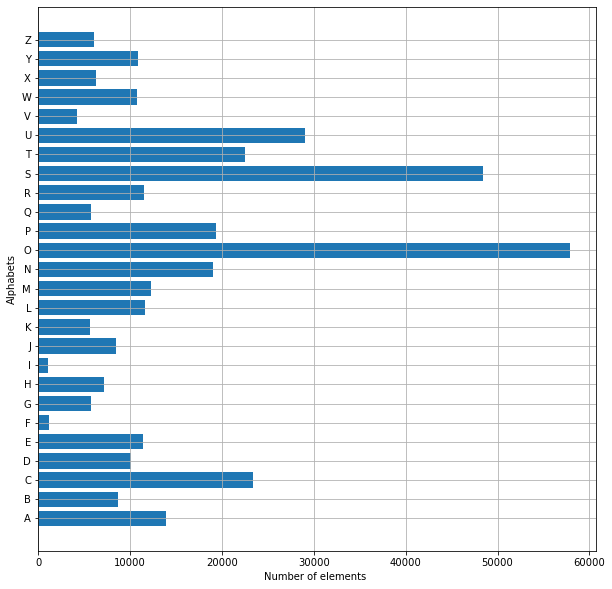

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, alphabet_counter)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

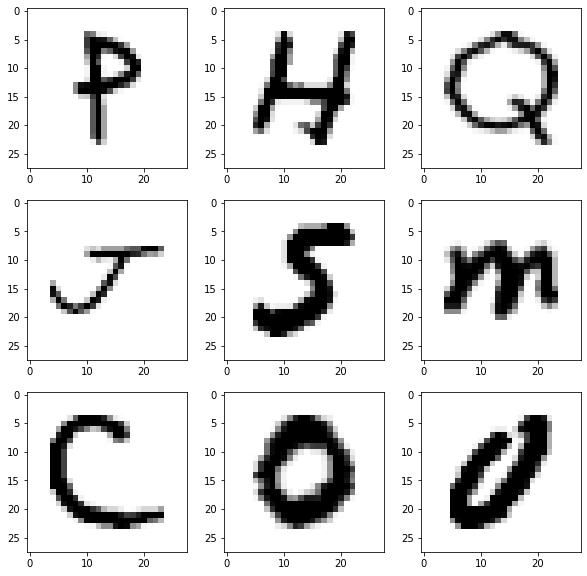

In [11]:
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
   # _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(train_x[i], (28,28)), cmap="Greys")
plt.show()

In [12]:
torch_train_x = []
for i in range(len(train_x)):
    torch_train_x.append(torch.from_numpy(train_x[i]))

In [37]:
#print(torch_train_x[:10])
d = {}
for i in range(256):
    d[str(i)]=0
for e in train_x[:20]:
    for ee in e:
        #ca = np.bincount(ee)
        for i in range(255):
            d[str(i)]+=ee.tolist().count(i)

{'1': 10, '2': 42, '3': 10, '4': 13, '5': 16, '6': 16, '7': 10, '8': 15, '9': 12, '10': 14, '11': 8, '12': 4, '13': 20, '14': 16, '15': 8, '16': 11, '17': 14, '18': 7, '19': 9, '20': 12, '21': 14, '22': 9, '23': 18, '24': 30, '25': 8, '26': 9, '27': 10, '28': 11, '29': 7, '30': 14, '31': 4, '32': 9, '33': 8, '34': 15, '35': 7, '36': 9, '37': 10, '38': 7, '39': 7, '40': 8, '41': 8, '42': 13, '43': 2, '44': 7, '45': 13, '46': 4, '47': 14, '48': 9, '49': 14, '50': 4, '51': 9, '52': 8, '53': 11, '54': 9, '55': 8, '56': 6, '57': 6, '58': 2, '59': 11, '60': 16, '61': 6, '62': 6, '63': 12, '64': 17, '65': 10, '66': 7, '67': 5, '68': 6, '69': 9, '70': 14, '71': 6, '72': 9, '73': 10, '74': 7, '75': 5, '76': 9, '77': 2, '78': 5, '79': 3, '80': 5, '81': 9, '82': 4, '83': 9, '84': 4, '85': 18, '86': 5, '87': 7, '88': 6, '89': 7, '90': 9, '91': 5, '92': 10, '93': 7, '94': 8, '95': 4, '96': 11, '97': 10, '98': 6, '99': 6, '100': 10, '101': 6, '102': 8, '103': 4, '104': 4, '105': 3, '106': 8, '107': 

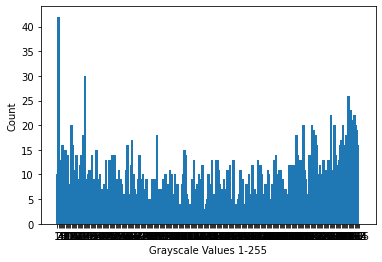

In [53]:
print(d)
#d.pop('0')
plt.bar(d.keys(),d.values(),2)
plt.xlabel("Grayscale Values 1-255")
plt.ylabel("Count")
plt.show()